In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

<Figure size 800x600 with 0 Axes>

In [23]:
diab=load_diabetes()
x=diab.data
y=diab.target

median_t=np.median(y)
binary_y=(y>median_t).astype(int)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,binary_y,test_size=0.2)

In [29]:
model=LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:,1]

In [35]:
acc=accuracy_score(y_test,y_pred)
print(acc*100)

69.66292134831461


In [37]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[34 18]
 [ 9 28]]


In [43]:
prs=precision_score(y_test,y_pred)
print(f"{prs:.2f}")

0.61


In [45]:
rec=recall_score(y_test,y_pred)
print(rec)

0.7567567567567568


In [49]:
f1=f1_score(y_test,y_pred)
print(f1)

0.6746987951807228


In [55]:
rocauc=roc_auc_score(y_test,y_pred_proba)
print(rocauc)

0.8295218295218294


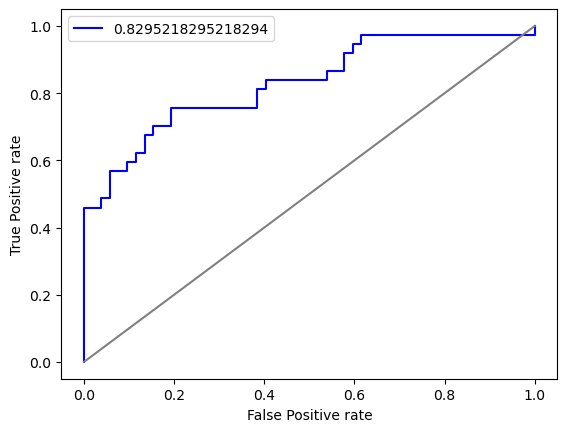

In [65]:
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,color="blue",label=rocauc)
plt.plot([0,1],[0,1],color="grey")
plt.legend()
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()